In [1]:
# inserting required libraries
import pandas as pd
import matplotlib.pyplot as plt

# LEVEL 1 - TASK 1 : TOP CUISINES 

In [2]:
print("\n \t----TOP CUISINES----\n")

# Loading the dataset from a CSV file
df = pd.read_csv("Dataset .csv")

#Drop rows with missing cuisine values
df = df.dropna(subset = ['Cuisines'])
print("Dataset after removing missing values: \n")
print(df['Cuisines'].head(10))
#slpit cuisines with comma and count each cuisine
cuisine_series = df['Cuisines'].str.split(',')
top_cuisines = cuisine_series.value_counts().head(3)
print("\n   Top 3 cuisines :\n " ,top_cuisines)


 	----TOP CUISINES----

Dataset after removing missing values: 

0            French, Japanese, Desserts
1                              Japanese
2      Seafood, Asian, Filipino, Indian
3                       Japanese, Sushi
4                      Japanese, Korean
5                               Chinese
6                       Asian, European
7    Seafood, Filipino, Asian, European
8               European, Asian, Indian
9                              Filipino
Name: Cuisines, dtype: object

   Top 3 cuisines :
  Cuisines
[North Indian]              936
[North Indian,  Chinese]    511
[Chinese]                   354
Name: count, dtype: int64


In [3]:
#calculagte the percentages
total_restaurants = df.shape[0]
cuisine_percentages = (top_cuisines / total_restaurants) * 100
print("\nPercentages of restaurants serving Top cuisines : ", cuisine_percentages.round(2))


Percentages of restaurants serving Top cuisines :  Cuisines
[North Indian]              9.81
[North Indian,  Chinese]    5.36
[Chinese]                   3.71
Name: count, dtype: float64


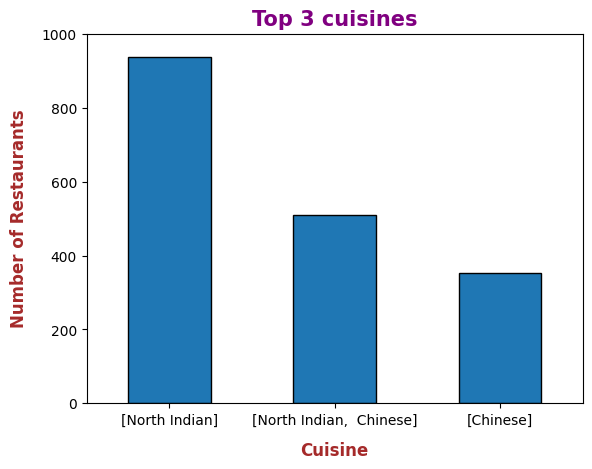

In [4]:
# Plot the top 3 cuisines using a bar chart
top_cuisines.plot(kind='bar', edgecolor = 'Black')
plt.xlabel('Cuisine', fontsize = 12 ,labelpad = 10, color = 'brown', weight = 'bold')
plt.xticks(rotation = 0)
plt.ylabel('Number of Restaurants', fontsize = 12 ,labelpad = 10,  color = 'brown', weight = 'bold')
plt.title('Top 3 cuisines', fontsize = 15 , color = 'purple', weight = 'bold')
plt.ylim(0, 1000)
plt.show()

# LEVEL 1 - TASK 2 : CITY ANALYSIS

In [5]:
print("\n \t----CITY ANALYSIS----")
# Drop missing values in the 'City' column
df = df.dropna(subset=['City', 'Aggregate rating'])
city_counts = df['City'].value_counts()
top_cities = city_counts
top_1_city = city_counts.idxmax()

print("\n Total number of restautrants in each city (Highest to Lowest order): ", top_cities.head(20))
print("\n * Top city with the highest number of restaurants : ", top_1_city)


 	----CITY ANALYSIS----

 Total number of restautrants in each city (Highest to Lowest order):  City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Dubai             20
Kochi             20
Indore            20
Jaipur            20
Kanpur            20
Ludhiana          20
Kolkata           20
Agra              20
Mangalore         20
Mumbai            20
Name: count, dtype: int64

 * Top city with the highest number of restaurants :  New Delhi


In [6]:
#Average rating per city
avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending= False).round(2).head(10)

print("\n Average rating per city:  ", avg_rating_per_city)

print("\n City with the highest average rating: ", avg_rating_per_city.idxmax())


 Average rating per city:   City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
Beechworth          4.60
London              4.54
Taguig City         4.53
Tagaytay City       4.50
Secunderabad        4.50
Name: Aggregate rating, dtype: float64

 City with the highest average rating:  Inner City


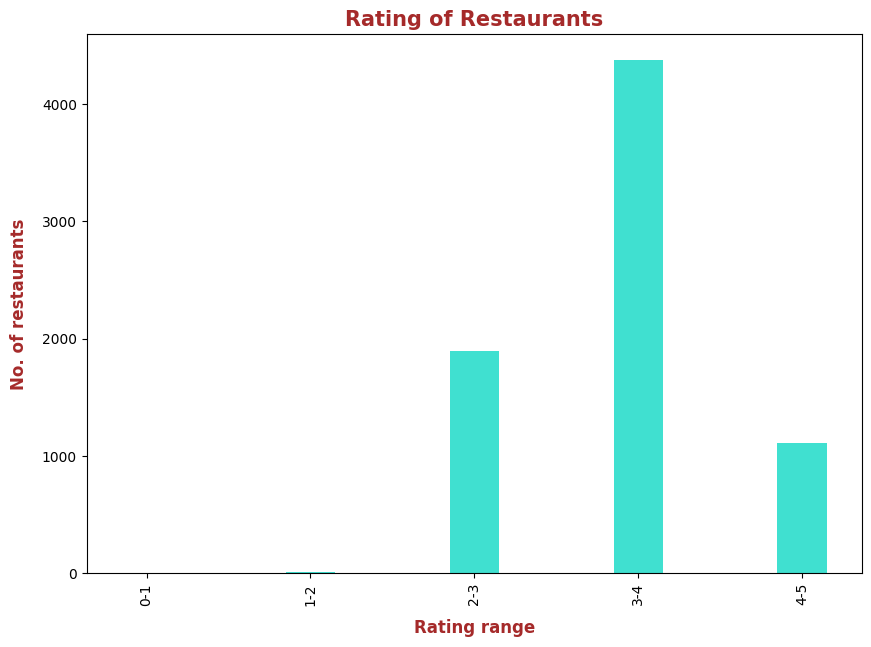

In [7]:
# Plotting the average rating of restaurants
bins = [0,1,2,3,4,5]
labels = ['0-1','1-2','2-3','3-4','4-5']

df['Rating range'] = pd.cut(df['Aggregate rating'], bins = bins, labels = labels)

rating_counts = df['Rating range'].value_counts().sort_index()

plt.figure(figsize = (10,7))
plt.bar(rating_counts.index, rating_counts.values, color='turquoise', width=0.3)
plt.xlabel('Rating range', fontsize = 12 , labelpad = 10, color = 'brown', weight = 'bold')
plt.ylabel('No. of restaurants', fontsize = 12 , labelpad = 10, color = 'brown', weight = 'bold')
plt.title('Rating of Restaurants', fontsize = 15 , color = 'brown', weight = 'bold')
plt.xticks(rotation = 90)
plt.show()


#  LEVEL 1 - TASK 3 : PRICE RANGE ANALYSIS

In [8]:
print("\n \t----PRICE RANGE ANALYSIS----\n")
# Count and percentage of each price range
price_counts = df['Price range'].value_counts()
price_percentages = (price_counts / df.shape[0]) * 100

print("\nPrice Range Distribution:\n", price_counts)
print("\nPercentage Distribution:\n", price_percentages.round(2))


 	----PRICE RANGE ANALYSIS----


Price Range Distribution:
 Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

Percentage Distribution:
 Price range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64


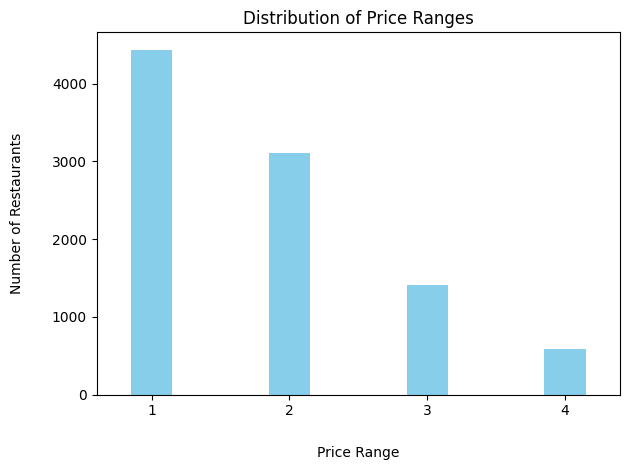

In [9]:
# Bar chart
price_counts.plot(kind='bar', color='skyblue', width=0.3)
plt.title("Distribution of Price Ranges")
plt.xlabel("Price Range", labelpad = 20)
plt.ylabel("Number of Restaurants", labelpad = 20)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# LEVEL 1 - TASK 4 : ONLINE DELIVERY ANALYSIS

In [10]:
print("\n \t----ONLINE DELIVERY ANALYSIS----")
#Percentage of restaurants offering online delivery
delivery_counts = df['Has Online delivery'].value_counts()
delivery_percentages = (delivery_counts / df.shape[0]) * 100

print("\n Online Delivery Availability:\n ", delivery_counts)
print("\n Percentage of Restaurants Offering Online Delivery:\n ", delivery_percentages.round(2))


 	----ONLINE DELIVERY ANALYSIS----

 Online Delivery Availability:
  Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

 Percentage of Restaurants Offering Online Delivery:
  Has Online delivery
No     74.31
Yes    25.69
Name: count, dtype: float64


In [11]:
# Comparison of average ratings for restaurants 
with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
without_delivery = df[df['Has Online delivery']== 'No']['Aggregate rating'].mean()

print(f"\n Average rating of restaurants with online delivery: {with_delivery:.2f}")
print(f"\n Average rating of restaurants without online delivery: {without_delivery:.2f}")


 Average rating of restaurants with online delivery: 3.25

 Average rating of restaurants without online delivery: 2.46


# LEVEL 3 - TASK 2 : VOTES ANALYSIS 


In [12]:
# drop rows with missing values in the 'Votes' and 'Rating 'column
df_votes = df.dropna(subset = ['Votes', 'Aggregate rating'])

# Highest and lowest voted restaurants 
max_votes = df_votes[df_votes['Votes'] == df_votes['Votes'].max()]
min_votes = df_votes[df_votes['Votes'] == df_votes['Votes'].min()]

print("\n Restaurant(s) with highest votes: \n", max_votes[['Restaurant Name','Votes']])
print("\n Restaurant(s) with lowest votes: \n", min_votes[['Restaurant Name','Votes']])




 Restaurant(s) with highest votes: 
     Restaurant Name  Votes
728            Toit  10934

 Restaurant(s) with lowest votes: 
                  Restaurant Name  Votes
69              Cantinho da Gula      0
874                The Chaiwalas      0
879           Fusion Food Corner      0
880                Punjabi Rasoi      0
887                Baskin Robbin      0
...                          ...    ...
9044               6 Packs Momos      0
9098                   Cafe' Wow      0
9099  Chef's Basket Pop Up Caf��      0
9103            The Hangout-Deli      0
9111                    Platters      0

[1094 rows x 2 columns]


Online Delivery vs Price Range (%):
 Has Online delivery     No    Yes
Price range                      
1                    84.20  15.80
2                    58.69  41.31
3                    70.75  29.25
4                    90.96   9.04


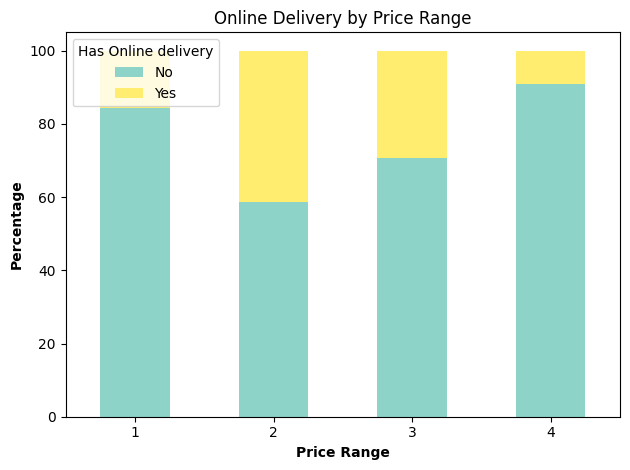


Table Booking vs Price Range (%):
 Has Table booking     No    Yes
Price range                    
1                  99.98   0.02
2                  92.32   7.68
3                  54.16  45.84
4                  53.24  46.76


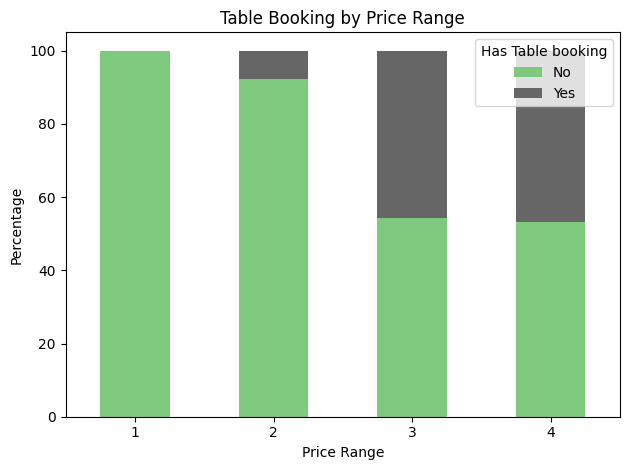

In [13]:

# Clean necessary columns
df_services = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])

# Cross-tabulation
online_delivery_relation = pd.crosstab(df_services['Price range'], df_services['Has Online delivery'], normalize ='index') * 100
table_booking_relation = pd.crosstab(df_services['Price range'], df_services['Has Table booking'], normalize = 'index') * 100
print("Online Delivery vs Price Range (%):\n", online_delivery_relation.round(2))

# Visualizing
online_delivery_relation.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Online Delivery by Price Range")
plt.xlabel("Price Range", weight = 'bold')
plt.ylabel("Percentage", weight = 'bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



print("\nTable Booking vs Price Range (%):\n", table_booking_relation.round(2))

# Visualizing
table_booking_relation.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Table Booking by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()